# RKD HTTP JSON with Python Example: Time-Series Interday


## Time-Series Interday Interday Introduction

RKD Time-Series Interday requests let you retrieve historical time series prices on an instrument, summarized in daily, weekly, monthly, quarterly, or annual periods. For each period, details such as the opening price, closing price, highest and lowest prices, Closing Yield value of the period, and Bid price and Ask price of the stock are retrieved. Historical interday time series prices for instruments are available back to 1981.


*Note*: A maximum of 5000 points is retrievable in a single call to the Time Series service. Any data over the 5000 record limit is
truncated. If you do need a great number of records (more than 5000 records), Refinitiv recommends that you break
up your query into several requests and then combine the responses together.

### RKD JSON application implementation process
The JSON application requires the following steps to consume data from RKD API services
1. Authentication with RKD Authentication service to get an authen token
2. Send a request message with the required input information and authen token to the interested RKD service

In [1]:
# #uncomment if you do not have requests installed

# #Install required packages in a current Jupyter kernal
# import sys
# !{sys.executable} -m pip install requests
# !{sys.executable} -m pip install matplotlib 
# !{sys.executable} -m pip install seaborn
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install --upgrade mplfinance

In [2]:
# import requires libraries for HTTP Request and JSON Operation

import os
import sys
import requests
import json
from dotenv import load_dotenv

In [3]:
# HTTP operations function
def doSendRequest(url, requestMsg, headers):
    result = None
    try:
        result = requests.post(url, data=json.dumps(requestMsg), headers=headers)
    except requests.exceptions.RequestException as e:
        print('Exception!!!')
        print(e)
    return result

### Authentication Process

You should save a text file with **filename** `.env` or Environment Variables having the following configurations:

```
#RKD Access Credentials
RKD_USERNAME=<RKD Username>
RKD_PASSWORD=<RKD Password>
RKD_APP_ID=<RKD App ID>
```

For you reference, please see more detail regarding RKD Authentication service in [RKD Tutorial: Authentication](https://developers.refinitiv.com/en/api-catalog/refinitiv-knowledge-direct/refinitiv-knowledge-direct-api-rkd-api/tutorials#rkd-tutorial-authentication) page.

In [4]:
%load_ext dotenv
%dotenv

# Input your RKD credentials here

username = os.getenv('RKD_USERNAME')
password = os.getenv('RKD_PASSWORD')
appid = os.getenv('RKD_APP_ID')

In [5]:
# Authentication parameters
token = None
expire = None

In [6]:
# RKD Authenticaion request message

authenMsg = {'CreateServiceToken_Request_1': {'ApplicationID': appid, 'Username': username, 'Password': password}}

# RKD Authentication service URL

authenURL = (
    'https://api.rkd.refinitiv.com/api/'
    'TokenManagement/TokenManagement.svc/REST/'
    'Anonymous/TokenManagement_1/CreateServiceToken_1'
)

# RKD Authentication headers

authen_headers = {'content-type': 'application/json;charset=utf-8'}

In [7]:
# Send Authentication request

authenResult = doSendRequest(authenURL, authenMsg, authen_headers)

In [8]:
if authenResult and authenResult.status_code == 200:
    print('Authen success')
    # print('JSON resonse: %s' % (json.dumps(authenResult.json(),sort_keys=True, indent=2, separators=(',', ':'))))
    token = authenResult.json()['CreateServiceToken_Response_1']['Token']
    expire = authenResult.json()['CreateServiceToken_Response_1']['Expiration']
elif authenResult.status_code != 200:
    print('Authen fail with status code %s' % authenResult.status_code)
    if authenResult.status_code == 500:
        print('Error: %s' % (json.dumps(authenResult.json(), sort_keys=True, indent=2, separators=(',', ':'))))

Authen success


### RKD Time-Series: Interday Service detail
#### RKD Service Token URL and Header

RKD Time Series provides Interday data for developers via GetInterdayTimeSeries_5 operation. The endponint of GetInterdayTimeSeries_4 operaion is the following URL:
[http://api.rkd.refinitiv.com/api/TimeSeries/TimeSeries.svc/REST/TimeSeries_1/GetInterdayTimeSeries_5](http://api.rkd.refinitiv.com/api/TimeSeries/TimeSeries.svc/REST/TimeSeries_1/GetInterdayTimeSeries_5)

- Header: 
  - Content-type = application/json
  - X-Trkd-Auth-ApplicationID = Application ID
  - X-Trkd-Auth-Token = service Token
- Method: Post

#### HTTP Request Post Body
The GetInterdayTimeSeries_4 operation requires the following properties in a request message's body
- Symbol: A RIC of the instrument for the interday prices you want to retrieve
- StartTime: Start date and time criteria of the search. The format of the Start time should be:
yyyy-mm-ddThh:mm:ss
- EndTime: End date and time criteria of the search. The format of the Start time should be:
yyyy-mm-ddThh:mm:ss
- Interval: The interval between samples. The choices are "DAILY", "WEEKLY", "MONTHLY", "QUARTERLY", "ANNUAL" string value.

You can find more detail regarding optional properties (such as in "TrimResponse" or "Field") in [RKD API Development Guide document](https://developers.refinitiv.com/en/api-catalog/refinitiv-knowledge-direct/refinitiv-knowledge-direct-api-rkd-api/documentation).

The request message structure is following
```
{
    "GetInterdayTimeSeries_Request_5":{
      "Symbol": <RIC name>,
      "StartTime": <yyyy-mm-ddThh:mm:ss>,
      "EndTime": <yyyy-mm-ddThh:mm:ss>,
      "Interval": "DAILY"
   }
}
```
*Note*: Please pay attention that maximum "EndDate" interval is >=2038. If you specify a greater "EndDate" interval, you receive a blank response.

#### HTTP Response

The application receives a HTTP response message from RKD from GetInterdayTimeSeries_5 operatio operation as the following attributes.
- HTTP Status: 200 OK
- Header: Content-type = application/json

The example of a response message for MSFT.O symbol and Daily interval is shown below
```
{
  "GetInterdayTimeSeries_Response_5":{
    "MetaFields":{
      "CCY":"USD",
      "NAME":"MICROSOFT CP",
      "QOS":"RT",
      "TZ":"NYC",
      "TZOFFSET":-300
    },
    "Row":[
      {
        "ASK":109.19,
        "BID":109.17,
        "CLOSE":109.19,
        "HIGH":109.24,
        "LOW":105.0,
        "OPEN":105.82,
        "TIMESTAMP":"2018-12-06T00:00:00+00:00",
        "VOLUME":49107431.0
      },
      {
        "ASK":104.8,
        "BID":104.78,
        "CLOSE":104.82,
        "HIGH":109.45,
        "LOW":104.3,
        "OPEN":108.38,
        "TIMESTAMP":"2018-12-07T00:00:00+00:00",
        "VOLUME":45044937.0
      }
    ]
  }
}
```


In [9]:
# Time-Series Interday parameters

ricName = 'IBM.N'
#change your fields (support these 'OPEN','HIGH','LOW','CLOSE','CLOSEYIELD','VOLUME','BID','ASK' fields only)
fields = ['OPEN','HIGH','LOW','CLOSE'] 

startTime = '2015-09-22T00:00:00' #change your StartTime
endtime = '2016-09-22T23:59:00'  #change your EndTime

# change your interval between 'DAILY', 'WEEKLY', 'MONTHLY', 'QUARTERLY' and 'ANNUAL'
interval = 'WEEKLY' 

In [10]:
# RKD Time-Series Interday Service URL
interdayURL = 'http://api.rkd.refinitiv.com/api/TimeSeries/TimeSeries.svc/REST/TimeSeries_1/GetInterdayTimeSeries_5'

# RKD Time-Series Interday request message headers
interday_headers = {
    'content-type': 'application/json;charset=utf-8' ,
    'X-Trkd-Auth-ApplicationID': appid, 
    'X-Trkd-Auth-Token' : token
}

# RKD Time-Series Interday request message 
interdayRequestMsg = {
        'GetInterdayTimeSeries_Request_5':{
            'Field': fields,
            'TrimResponse': False,
            'Symbol': ricName,
            'StartTime':startTime,
            'EndTime':endtime,  
            'Interval':interval,
            'MetaField': ['NAME','QOS','CCY','TZ','TZOFFSET','NAME_LL']
        }
    }

In [11]:
# Send Time-Series: Interday request

interdayResult = doSendRequest(interdayURL, interdayRequestMsg, interday_headers)

In [12]:
if interdayResult and interdayResult.status_code == 200:
        print('Time Series Interday response message: ')
        print(json.dumps(interdayResult.json(), sort_keys=True, indent=2, separators=(',', ':')))

Time Series Interday response message: 
{
  "GetInterdayTimeSeries_Response_5":{
    "MetaFields":{
      "CCY":"USD",
      "NAME":"INTL BUS MACHINE",
      "QOS":"DLY",
      "TZ":"NYC",
      "TZOFFSET":-300
    },
    "Row":[
      {
        "CLOSE":138.89994888,
        "HIGH":140.37090144,
        "LOW":135.5855298,
        "OPEN":138.82353576,
        "TIMESTAMP":"2015-09-25T00:00:00+00:00"
      },
      {
        "CLOSE":138.09761112,
        "HIGH":139.17694644,
        "LOW":134.25785184,
        "OPEN":137.85882012,
        "TIMESTAMP":"2015-10-02T00:00:00+00:00"
      },
      {
        "CLOSE":145.55744196,
        "HIGH":146.20695348,
        "LOW":139.37753088,
        "OPEN":139.47304728,
        "TIMESTAMP":"2015-10-09T00:00:00+00:00"
      },
      {
        "CLOSE":143.64711396,
        "HIGH":145.73892312,
        "LOW":141.94692204,
        "OPEN":145.50013212,
        "TIMESTAMP":"2015-10-16T00:00:00+00:00"
      },
      {
        "CLOSE":138.19312752,
        "

### Creating a Pandas Data Frame
Next, we convert incoming JSON object to a [Pandas](https://pandas.pydata.org/) Data Frame object. We get a list of columns names from the JSON object and construct a data frame named *df*.

In [14]:
# import requires Pandas and matplotlib libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [15]:
interday_data = interdayResult.json()['GetInterdayTimeSeries_Response_5']['Row']

In [16]:
columns = [key for key in interday_data[0]]

In [17]:
df = pd.DataFrame(interday_data, columns = columns)


In [18]:
# check Data Frame object output
if not df.empty:
    print('Data Frame row numbers = %d' % len(df.index))
    print('Example 10 rows are:')
    print(df.head(10))

Data Frame row numbers = 52
Example 10 rows are:
         OPEN        HIGH         LOW       CLOSE                  TIMESTAMP
0  138.823536  140.370901  135.585530  138.899949  2015-09-25T00:00:00+00:00
1  137.858820  139.176946  134.257852  138.097611  2015-10-02T00:00:00+00:00
2  139.473047  146.206953  139.377531  145.557442  2015-10-09T00:00:00+00:00
3  145.500132  145.738923  141.946922  143.647114  2015-10-16T00:00:00+00:00
4  143.131325  143.245945  133.063897  138.193128  2015-10-23T00:00:00+00:00
5  138.259989  138.489228  131.172672  133.799373  2015-10-30T00:00:00+00:00
6  134.200542  136.387868  131.698012  132.051423  2015-11-06T00:00:00+00:00
7  131.812632  131.860390  125.747341  125.842857  2015-11-13T00:00:00+00:00
8  125.928822  132.681831  125.928822  132.290214  2015-11-20T00:00:00+00:00
9  132.318869  133.091597  130.972088  132.252007  2015-11-27T00:00:00+00:00


## Ploting Graph
We use Python [Matplotlib](https://matplotlib.org/) library to plot a graph from Pandas Data Frame object. The target graph compares 'Open', 'High', 'Low' and 'Close' data between time ('Timestamp' field). 

We firstly re-arrange and re-format the Timestamp value in the Data Frame object to use it in X-axis for the graph.

In [19]:
df['TIMESTAMP']= df['TIMESTAMP'].str.split('T00').str[0]
df.sort_values('TIMESTAMP',ascending=True,inplace=True)

Then we plotting a graph, the X-axis is 'Timestamp' values and the Y-axis is fields values.

<Axes: xlabel='TIMESTAMP'>

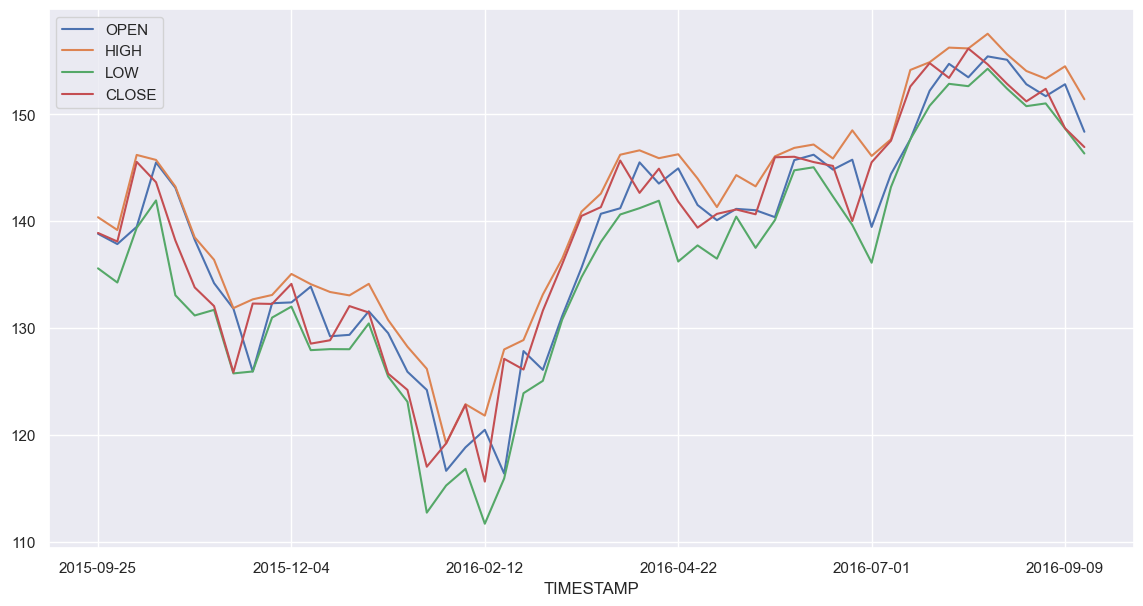

In [20]:
df.plot(x = 'TIMESTAMP',y = fields,figsize=(14,7))

## Ploting CandleStick Graph
We use Python [mpl-finance](https://pypi.org/project/mpl-finance/) library to plot a candlestick graph from Pandas Data Frame object. The target graph compares 'Open', 'High', 'Low' and 'Close' data between time ('Timestamp' field). 

In [21]:
import datetime as dt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

In [22]:
candle_df = df[['OPEN','HIGH','LOW','CLOSE']]

In [23]:
candle_df.insert(0,'TIMESTAMP', df['TIMESTAMP'].map(mdates.datestr2num))

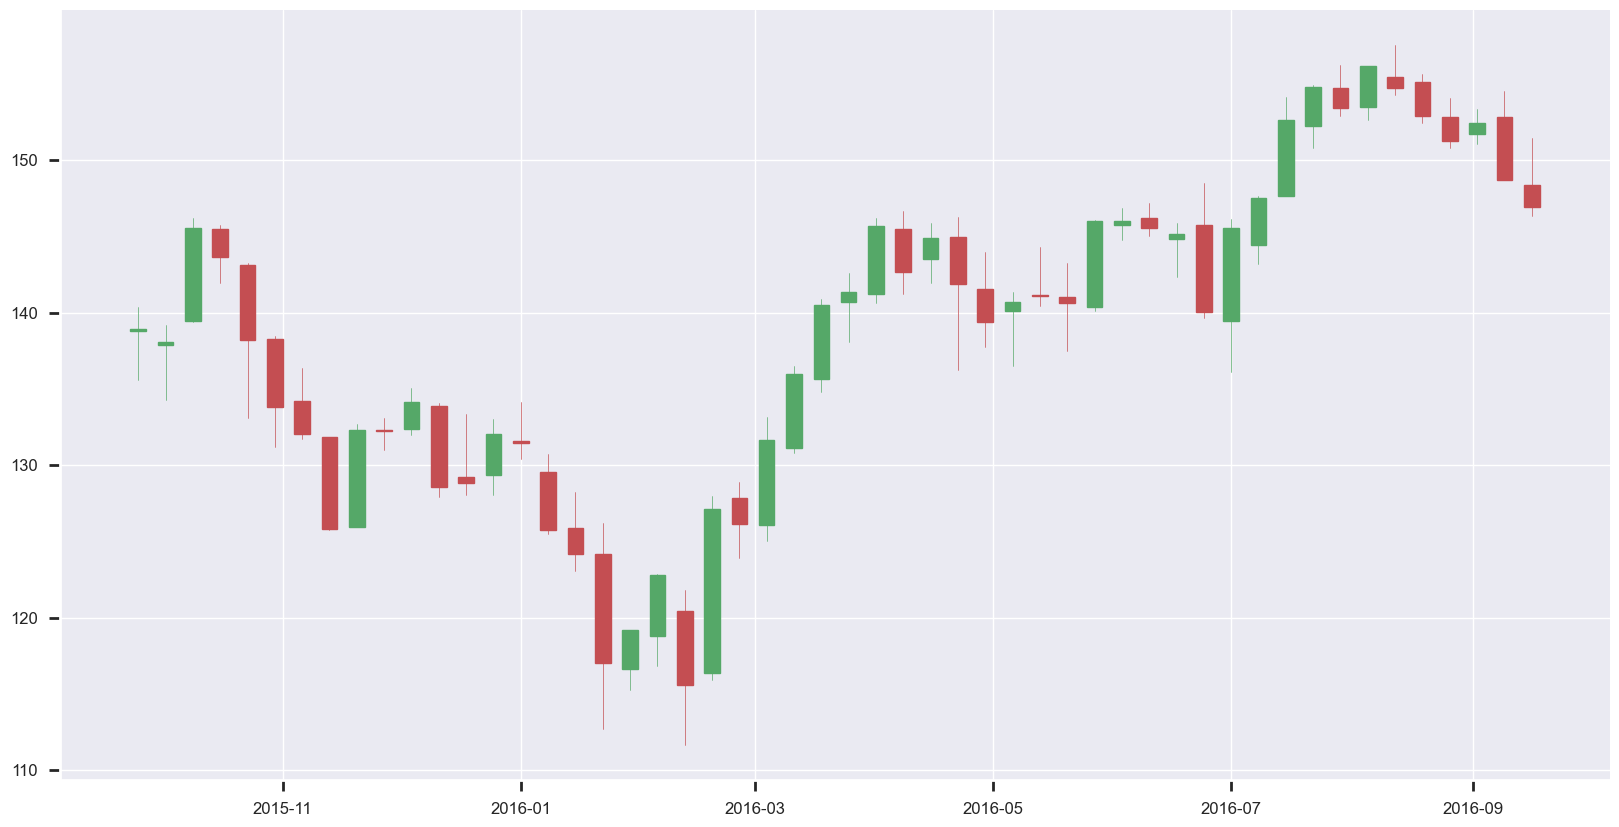

In [24]:
fig = plt.figure(figsize=(20, 10))
ax = plt.subplot()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='both', direction='out', width=2, length=8,
               labelsize=12, pad=8)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

candlestick_ohlc(ax, candle_df.values, width = 4, colorup = 'g', colordown = 'r')
ax.xaxis_date()
ax.grid(True)
plt.show()

## References
For further details, please check out the following resources:

- [LSEG Knowledge Direct API Official website](https://support-portal.rkd.refinitiv.com/SupportSite/Home/UserHome).
- [Knowledge Direct API page](https://developers.lseg.com/en/api-catalog/refinitiv-knowledge-direct/refinitiv-knowledge-direct-api-rkd-api) on the [LSEG Developers Portal](https://developers.LSEG.com/) website.
- [Knowledge Direct API Catalog](https://support-portal.rkd.refinitiv.com/SupportSite/TestApi/Catalog) website.
- [WebSocket API](https://developers.refinitiv.com/websocket-api) page on the [Refinitiv Developers Community](https://developers.refinitiv.com/) website.

For any questions related to this tutorial or RKD API, please use the Developer Community [Q&A Forum](https://community.developers.refinitiv.com).